# The conceptual foundations
There are two main NBDA variants: order-of-acquisition diffusion analysis (OADA), which takes as data the order in which individuals acquired the target behaviour, and time-of-acquisition diffusion analysis (TADA), which uses the times of acquisition of the target behaviour. TADA can be further subdivided into versions that treat time as either a continuous variable (continuous TADA or ‘cTADA’) or as a discrete variable split into units (discrete TADA or ‘dTADA’). Choice of OADA versus cTADA versus dTADA depends on the diffusion data available and the assumptions one is willing to make about how the rate of learning changes over time (i.e. the shape of the baseline rate function, λo(t)). 

OADA makes no assumptions about the shape of $λ_o(t)$, but only assumes that this function is the same for every individual in the diffusion. In contrast, TADA requires a researcher to make assumptions about the form of $λ_o(t)$, and fit parameters controlling its shape. When these assumptions are met, TADA offers more statistical power than OADA (Hoppitt, Boogert, et al., 2010), particularly when the network is densely connected with little variation in connection strength. Indeed, when the network is completely homogeneous (i.e. all possible connections exist and are of equal strength), OADA cannot distinguish social transmission from asocial learning since all orders of acquisition would be equally likely in both models. 

In the simplest case, one can fit a TADA that assumes a constant baseline learning rate, $λ_o(t) = λ_o$, with an extra parameter, $λ_o$, fitted to the data (Franz & Nunn, 2009; Hoppitt, Boogert, et al., 2010). However, this assumption may often not hold—for example, individuals might initially exhibit neophobic responses towards a learning task, but as neophobia fades over time, asocial learning rates should increase. Such circumstances can cause a spurious positive result for social transmission in a TADA (Hoppitt, Kandler, Kendal, & Laland, 2010). 

Fortunately, TADA can be modified to have a non-constant baseline rate. Although any positive function can be specified for $λ_o(t)$, the $NBDA$ package has two functions built-in which will be sufficient in most cases. One corresponds to a *gamma* distribution of latencies under asocial learning (Hoppitt, Kandler, et al., 2010), and the other to a *Weibull* distribution of latencies (a common choice in survival analysis; Moore, 2016). Both offer flexible modelling of λo(t) with a shape parameter that allows for the possibility of systematically increasing, decreasing or constant baseline functions.

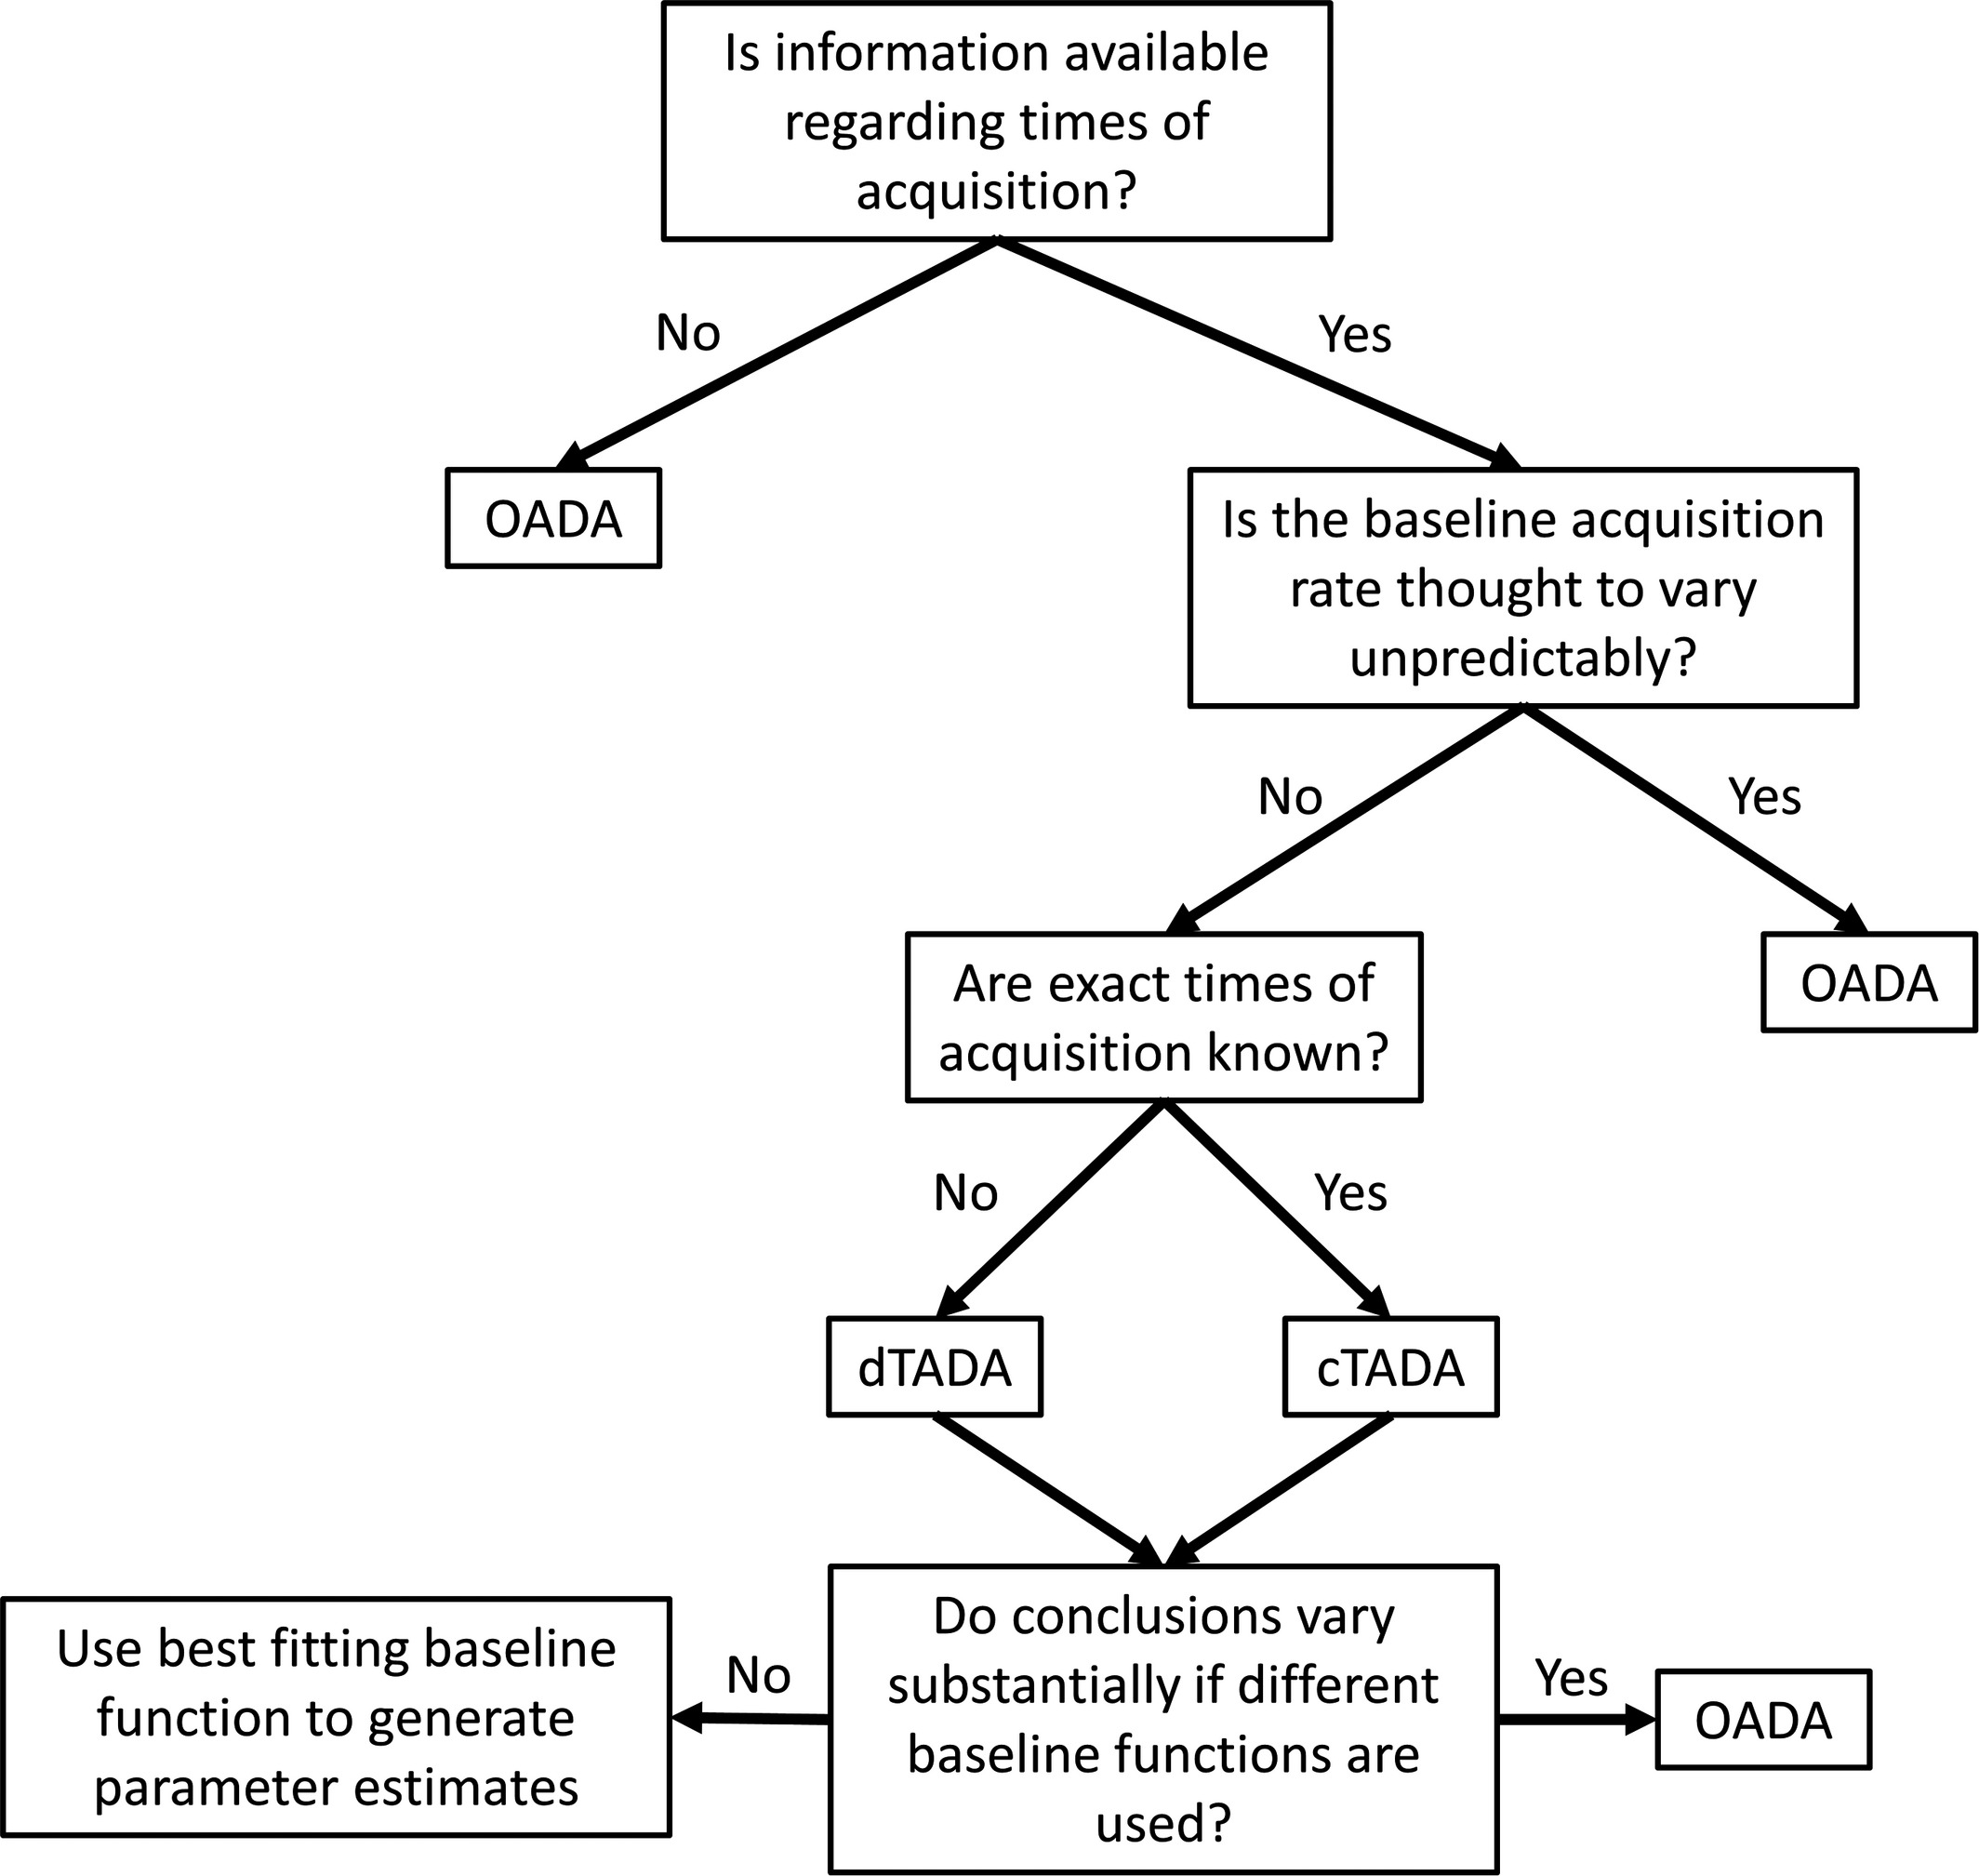

https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/1365-2656.13307


## Basic formulation

### Previous formulation of time of acquisition diffusion analysis
There are two parameters of interest in the basic time of acquisition diffusion analysis model: the rate of social transmission be-tween individuals per unit of network connection,*s*, and the baseline rate of trait performance in the absence of social transmission, $λ_0$ . Throughout this chapter, we refer to the s parameter as the social transmission parameter, and to $λ_0$  as the baseline parameter. The hazard function for the model is expressed as:

$$
\lambda_i(t) = \lambda_0(t) (1- z_i(t)) R_i(t)
$$

such that:

$$
R_i(t) =   \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + 1 \right] 
$$

Where:

- $\lambda_i(t)$ is the rate at which individuals *i* acquire the task solution at time *t*.
  
- $\lambda_0(t)$ is a baseline acquisition function determining the distribution of latencies to acquisition in the absence of social transmission (that is, through asocial learning).
  
- $z_i(t)$ gives the status (1 = informed, 0 = naïve) of individual *i* at time *t*.
  
- $(1- z_i(t))$ and $z_j (t)$ terms ensure that the task solution is only transmitted from informed to uninformed individuals:
$$
z_j(t) =  Y_i \sim \begin{cases} 
0, & \text{if j is naive} \\
1, & \text{if j is informed}
\end{cases}
$$

Previous versions of time of acquisition diffusion analysis allow for an increasing or decreasing baseline rate $\lambda_0 (t)$ (Hoppitt, Kandler,et al. 2010). Here, we restrict ourselves to expanding the version for a constant baseline rate (i.e. $\lambda_0(t) = \lambda_0$) (Hoppitt, Boogert, et al. 2010), although the version for a non-constant baseline rate can be expanded in the same way.

From :  https://besjournals.onlinelibrary.wiley.com/doi/10.1111/1365-2656.13307 supporting information we get the following:

Here, we show how a basic OADA model, containing only a single parameter, s, is fitted to the data by maximum likelihood. Note that this process is carried out automatically by the NBDA package (Hoppitt et al. 2019) when fitting an OADA model, but it is useful for a researcher to understand how the model is fitted. Maximum likelihood works by finding the values of the parameters for which the observed data is most likely. This is done by first deriving a likelihood function that specifies the likelihood of the data for a given set of parameter values. For OADA, the likelihood for a single acquisition event, E, is:

$$L(E) = \frac{\lambda_e (t_E) }{\sum_{l = 1}^{N} \lambda_l (t_E)}$$

Where e is the individual that learns on event E, and $t_E$  is the time immediately prior to event E. In other words,  $L_E$ is the probability that e would be the next individual to learn, which is the rate of learning for e at time  $t_E$, divided by the sum of rates for everyone in the population, $\sum_{l = 1}^{N} \lambda_l (t_E)$. If we define the relative rate of learning to be:
$$
R-i(t) = \frac{\lambda_i (t)}{\lambda_0(t)} = \lambda_i(t) = \lambda_0(t) (1- z_i(t)) \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + 1 \right] 
$$

$L(E)$ then reduces to: 

$$L(E) = \frac{\lambda_0 (t) R_e (t_E) }{\lambda_0(t) \sum_{l = 1}^{N} R_e (t_E)} = \frac{R_e (t_E)}{\sum_{l = 1}^{N} R_e (t_E)}$$

Therefore, $\lambda_0 (t)$ drops out of the likelihood function. The likelihood function for the whole diffusion, L, is the product of the likelihoods for all acquisition events. In principle, the value of s could be chosen to directly maximise the likelihood. However, for computational stability, one equivalently takes the negative logarithm of the likelihoods for each event and adds them together, -log(L), then finds the value of s that minimizes -log(L), where:

$$
log(L) = \sum_{E = 1}^{D} log(R_e (t_E)) - \sum_{E = 1}^{D} log\Biggl(\sum_{l = 1}^{N}R_e (t_E)\Biggr) 
$$


This value of s is known as the maximum likelihood estimator for s, and the corresponding value of -log(L) is known as the negative log-likelihood (or -log-likelihood) for the model. When there is more than one parameter in the model, the optimization algorithm finds the combination of parameter values that minimizes -log(L). A review of the likelihood functions for NBDA, including cTADA and dTADA, is found in Hoppitt and Laland (2013).

## Why do we need Bayesian networkbased diffusion analysis?
- The expansion of network-based diffusion analysis to multiple diffusions could also be valuable where researchers have repeated diffusions
across the same group, or groups, of animals (e.g. Boogert et al. 2008), especially when they only have a limited number of animals, allowing them to obtain good statistical power. However, a statistical problem arises if they fail to account for the fact that the same individuals are involved in multiple diffusions. By including an individual random effect on the asocial rate of learning, the model accounts for the fact that the same individuals have the same (or similar) asocial learning ability in each diffusion. However, random effects can be difficult to implement using maximum likelihood methods (used to fit network-based diffusion analysis models thus far), especially when the random effects structure is complex, because one has to integrate the likelihood function across all the possible values the random effects could take. It is easier to include random effects in a Bayesian model, using Markov chain Monte Carlo methods (Gelman et al. 2004).

- To combine NBDA to Bayesian network models that account more accurately for sampling biases.
  



## Bayesian formulation of time of acquisition diffusion analysis
In principle, the formulation of the model can remain the same for a Bayesian approach as for a model fitted by maximum likelihood. However,
here we wish to include random effects, and reparameterize the model in a way that makes it easier to use in a Bayesian context. Thus, we apply a_ Bayesian time of acquisition diffusion analysis_ to the simulated dataset described in ‘Previous formulation of time of acquisition diffusion analysis’ to assess its performance under different circumstances. To illustrate the importance of both random
effects and social transmission, four models were considered based on their inclusion/exclusion. Two of the models (Models 1 and 2) do not include random effects, while Models 3 and 4 do. Likewise two f the models (Models 1 and 3) do not include an *s* parameter, while Models 2 and 4 do. Please see Table 5.1 for details.

The linear predictors are easily adapted to include random effects. For Models 3 and 4 for example, random effects ε at the individual level
were considered such that ε = {ε1, . . . , ε10} and the total number of individuals is ten. The term Ri(t) in Equation 2 is therefore expanded to:


$$
R_i(t) =   \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + \exp(\epsilon_k) \right] 
$$

where:
- $k \in {1,...,5}$ and and depends on which task is involved. The rate of trait performance $\lambda_i (t)$ for individual *i*, at time *t* therefore becomes:

$$
\lambda_i(t) = \lambda_0(t) (1-z_i(t))  \left[ s \sum_{j = 1}^{N} a_{ij} z_j (t) + \exp(\epsilon_k) \right] 
$$

To allow us to more easily set a prior distribution reflecting our state of knowledge (see below), Equation 7 is then re-parameterized to obtain :

$$
\lambda_i(t) = (1-z_i(t))  \left[\lambda_0 s \sum_{j = 1}^{N} a_{ij} z_j (t) + \lambda_0\exp(\epsilon_k) \right] 
$$

giving:

$$
\lambda_i(t) = (1-z_i(t))  \left[s' \sum_{j = 1}^{N} a_{ij} z_j (t) + \lambda_0\exp(\epsilon_k) \right]
$$

where:
- $s' = \lambda_0s$

The effect of social interactions on the rate of learning $s'$ and the baseline rate of learning $\lambda_0$ are the two parameters of interest. We refer to the re-parameterized $s′$ as the unscaled social transmission parameter, since it is not scaled such that it is quantified relative to the rate of asocial learning, as $s$ is. The social effect parameter $s'$ may be interpreted as the median effect of the social interactions on the overall hazard rate. For instance, where social transmission underlies the diffusion, $s'$ is a measure of its strength. The baseline rate parameter expresses the hazard
of an individual in an asocial environment (for instance, the rate of asocial learning). This parameter is frequently termed a ‘nuisance’ parameter because the parameter of interest in the NBDA analyses is predominantly $s'$.The full parameter vector θ is defined as $0 = \{ s', \lambda_0, \epsilon, \sigma_{\epsilon}^{2}\} $, where ε refers to random effects at the task level. The variance term $\sigma_{\epsilon}^{2}$ denotes the variance for the distribution of the task level random effects.



(17) (PDF) Quantifying diffusion in social networks: a Bayesian approach. Available from: https://www.researchgate.net/publication/270048687_Quantifying_diffusion_in_social_networks_a_Bayesian_approach [accessed Oct 24 2024].

# Simulation functions

In [1]:
import os
import sys
newPath = os.path.dirname(os.path.dirname(os.path.abspath("")))
if newPath not in sys.path:
    sys.path.append(newPath)

from main import *
import igraph as ig
import matplotlib.pyplot as plt
m = bi(platform='cpu')

jax.local_device_count 32


## Covariates simulation

In [2]:
import jax.numpy as jnp
import jax.random as jr
jnp.set_printoptions(precision=2,linewidth=200)

def symmetrize(array):
    return (array + array.T) / 2
    
def sim_grp_equal_prob(G, N):
    # Create a 1D array of ones with length G
    ones = jnp.ones((G,))

    # Normalize to get equal probabilities
    equal_probs = ones / G

    # Generate multinomial probabilities
    grp_prob = m.dist.multinomialprobs(equal_probs, 1, sample=True, shape=(N,))

    # Use vmap with jnp.argmax to sample indices
    return vmap(jnp.argmax)(grp_prob)

def sim_grp(N, Ngrp=2,gByGrp=jnp.array([1,3])):
    return [sim_grp_equal_prob(gByGrp[i],N) for i in range(len(gByGrp))]

def create_random_network(n, rate = 0.2, seed=0):
    """
    Create a random network adjacency matrix using the Erdős-Rényi model.
    
    Parameters:
        n (int): Number of nodes in the network.
        rate (float): ate parameter (mean of the distribution), must be >= 0.
        seed (int): Random seed for reproducibility.
        
    Returns:
        jax.numpy.ndarray: Adjacency matrix of the generated random network.
    """
    # Set the random seed for reproducibility
    key = jax.random.PRNGKey(seed)
    
    upper_tri = jax.random.poisson(key,lam = rate,  shape = (n, n))
    lower_tri = upper_tri
    
    # Make the matrix symmetric to represent an undirected graph
    m = upper_tri + lower_tri
    m = m.at[jnp.diag_indices(m.shape[0])].set(0)
    return m

def viz_network(network, block1):
    # Convert the input data to NumPy arrays
    adj_matrix_np = np.array(network)
    block1_np = np.array(block1)

    # Create an igraph graph from the adjacency matrix
    G = ig.Graph.Adjacency((adj_matrix_np > 0).tolist())

    # Add weights to the edges if the adjacency matrix contains weights
    G.es['weight'] = adj_matrix_np[adj_matrix_np.nonzero()] / 4

    # Define the layout
    layout = G.layout_kamada_kawai()

    # Map the color array to specific colors
    color_map = {0: 'red', 1: 'green', 2: 'blue'}
    node_colors = [color_map[color] for color in block1_np]

    # Plot the graph
    fig, ax = plt.subplots(figsize=(10, 10)) 
    ig.plot(G, layout=layout, vertex_label=range(G.vcount()), vertex_size=30, vertex_color=node_colors, edge_width=G.es['weight'], target=ax)

    # Display the plot
    plt.show()

def create_covariates(N=50, times=100,
b_ij_mean1 = 0.5, b_ij_sd1 = 0.5, b_ii_mean1 = 0.7, b_ii_sd1 = 1.5,
b_ij_mean = 0.02, b_ij_sd = 0.1, b_ii_mean = 0.4, b_ii_sd = 0.1):

    ## Block ---------------------------------------
    blocks = sim_grp(N, Ngrp=2,gByGrp=jnp.array([1,3]))
    block0=blocks[0]
    block1=blocks[1]
    B0 = bi.net.block_model(block0,1, b_ij_mean = b_ij_mean1, b_ij_sd = b_ij_sd1, b_ii_mean = b_ii_mean1, b_ii_sd = b_ii_sd1,sample=True)
    B1 = bi.net.block_model(block1,3, b_ij_mean = b_ij_mean, b_ij_sd = b_ij_sd, b_ii_mean = b_ii_mean, b_ii_sd = b_ii_sd,sample=True)

    ### SR shape =  N individuals---------------------------------------
    focal_individual_predictors = m.dist.binomial(total_count = 1, logits = 0.2, sample=True, shape=(1,N)) # Fixed covariate
    target_individual_predictors=focal_individual_predictors
    sr =  bi.net.sender_receiver(focal_individual_predictors,target_individual_predictors,sample=True)

    ## Dyadic shape = N dyads-------------------------------------- 
    covDF = create_random_network(N, rate=0.1) # Fixed dyadic covariate
    covDF = jnp.where(covDF > 0, 1, 0) 
    dyadic_predictors =bi.net.mat_to_edgl(covDF)
    dr = bi.net.dyadic_effect(dyadic_predictors=dyadic_predictors, shape=(N,), sample=True)

    network=bi.net.edgl_to_mat(bi.poisson(jnp.exp(B0 + B1 + sr + dr),sample=True ), N)


    viz_network(network, block1)


    time = jnp.arange(0,times)
    covF = focal_individual_predictors # Fixed covariate
    jnp.tile(covF[0,:], (times, 1)).T.shape

    # Time-varying covariate

    covV = bi.dist.poisson(5, sample=True, shape=(N,)) # time-varying covariate
    covV = vmap(lambda x: covV + x)(time).T
    covDV = vmap(lambda x: create_random_network(N, rate=0.3, seed=x))(time).transpose(1,2,0) # Time-varying dyadic covariate
    covDF = jnp.stack([covDF] * times, axis=2)

    return {
        'covF': covF[0,:],
        'covV': covV,
        'network': network,
        'covDF': covDF,
        'covDV': covDV
    }

def heatmap(array):
    # Convert to NumPy for Matplotlib
    data_np = jnp.array(array)  # Alternatively, use `data.to_numpy()`

    # Plot heatmap
    plt.imshow(data_np, cmap="viridis", aspect="auto")
    plt.colorbar(label="Value")
    plt.show()


To create covaraites just run ```covariates_data = create_covariates(N=N, times=times)```

## NBDA class
This class will store and adapt data for the NBDA model.

In [8]:
import pandas as pd
import jax
import jax.numpy as jnp
from functools import partial
from jax import vmap


class NBDA:

    def __init__(self,network,status):
        """
        Initialize an NBDA object with network and status arrays.

        Args:
            network (Array): A 2-dimensional array of shape (n, n) or a 4-dimensional array of shape (n, n, t, num_networks). 
                             If 2D, it is repeated across time. If 4D, it should be created by the user.
            status (Array): A 2-dimensional array of shape (n, t) representing the status of nodes over time.

        Returns:
            None
        """
        # Status 
        self.status=status
        self.n=status.shape[0]
        self.t=status.shape[1]

        ## Status at t-1
        self.status=status
        self.status_i, self.status_j = self.convert_status(status)

        # Network
        self.network=None
        if len(network.shape)==2:
            self.convert_network(network)
        elif (len(network.shape)==4):
            self.network=network
        elif (len(network.shape)!=4):
            raise ValueError("Network must be a 2 (n, n) or 4 dimensional array (n, n, t, num_networks)")

        # Intercetps for the network
        self.intercept = jnp.ones(self.network.shape)

        # fixed nodal covariates
        self.covNF_i=None
        self.covNF_j=None

        # Time-varying nodal covariates
        self.covNV_i=None
        self.covNV_j=None

        # fixed dyadic covariates
        self.covDF=None

        # Time-varying dyadic covariates
        self.covDV=None

        # individual observed
        self.observed=None

        # Conatenated covariates
        self.D_social=None
        self.D_asocial=None

    def convert_network(self, network): # To be used only if there is a single network

        """
        Convert a single network array to a 4D array.

        Args:
            network (Array): A 2-dimensional array of shape (n, n).

        Returns:
            network: A 4-dimensional array of shape (n, n, t, 1) after repeating the network across time.
        """

        self.network=jnp.repeat(network[jnp.newaxis, :, :,jnp.newaxis], self.t, axis=0).transpose((1,2,0,3))
        return self.network


    def convert_status(self, status):#A 2-dimension arrray of (n,t)
        """
        Convert status array to lagged status arrays for i and j.

        Args:
            status (Array): A 2-dimensional array of shape (n, t).

        Returns:
            arrays_status_i (Array): A 3-dimensional array of shape (n, n, t) for i.
            arrays_status_j (Array): A 3-dimensional array of shape (n, n, t) for j.
             ! Both status are the lagged status (t-1) !
        """
        tmp=jnp.concatenate([jnp.zeros((self.n,1)),status[:,:-1]], axis=1)
        tmp2=jnp.array([tmp[:,i][:, None, None]* jnp.ones((self.n, self.n, 1)) for i in range(self.t)])
        tmp3=jnp.array([status[:,i][:, None]* jnp.ones((self.n,  1)) for i in range(self.t)])

        self.arrays_status_i = jnp.transpose(tmp2,(1,2,0,3))
        self.arrays_status_j = jnp.transpose(tmp2,(2,1,0,3))
        self.status = jnp.transpose(tmp3,(1,0,2))
        return self.arrays_status_i, self.arrays_status_j

    def covNF_dims(self,df, n, t, num_variables):
        """
        Convert fixed nodal covariates into 4D arrays.

        Args:
            df (DataFrame or Array): A 2-dimensional array of shape (n, num_variables).
            n (int): Number of nodes.
            t (int): Number of time points.
            num_variables (int): Number of covariates.

        Returns:
            result_array_i (Array): A 4-dimensional array of shape (n, n, t, num_variables) for i.
            result_array_j (Array): A 4-dimensional array of shape (n, n, t, num_variables) for j.
        """
        # Create arrays using broadcasting
        arrays = jnp.array([df[:, var_idx].reshape(-1, 1) * jnp.ones((n, n, t)) for var_idx in range(num_variables)])

        # Transpose arrays to get the required shape
        result_array_j = jnp.transpose(arrays, (1, 2, 3, 0))  # (n, n, t, num_variables)
        result_array_i = jnp.transpose(arrays, (2, 1, 3, 0))  # (n, n, t, num_variables)

        return result_array_i, result_array_j

    def convert_covNF(self, df, n, t, num_variables):
        """
        Convert fixed nodal covariates into 4D arrays.

        Args:
            df (DataFrame or Array): A 2-dimensional array of shape (n, num_variables).
            n (int): Number of nodes.
            t (int): Number of time points.
            num_variables (int): Number of covariates.

        Returns:
            tuple: A tuple of two 4-dimensional arrays (result_array_i, result_array_j).
        """
        if isinstance(df, pd.DataFrame):
            df = jnp.array(df)
        else:
            if len(df)>2:
                raise ValueError("covariates must be a data frame or a 2-dimensional array")

        return  self.covNF_dims(df, n, t, num_variables)

    def import_covNF(self, df):
        """
        Import fixed nodal covariates.

        Args:
            df (DataFrame or Array): A 2-dimensional array of shape (n, num_variables).

        Returns:
            tuple: A tuple of two 4-dimensional arrays (covNF_i, covNF_j).
        """
        self.covNF_i, self.covNF_j = self.convert_covNF(df, self.n, self.t, df.shape[1])
        return self.covNF_i, self.covNF_j

    def convert_covNV(self, covV):
        """
        Convert time-varying nodal covariates into 4D arrays.

        Args:
            covV (Array): A 3-dimensional array of shape (num_variables, n, t).

        Returns:
            tuple: A tuple of two 4-dimensional arrays (result_array_i, result_array_j).
        """
        arrays=jnp.array([covV[i,:, ].T[:, None, :]* jnp.ones((1, self.n, 1)) for i in range(covV.shape[0])])
        result_array_i = jnp.transpose(arrays, (2, 3, 1, 0))  # (n, n, t, num_variables)
        result_array_j = jnp.transpose(result_array_i, (1, 0, 2, 3))
        
        return result_array_i, result_array_j

    def import_covNV(self, covV): #covV need to be a 3 dimensional array of shape (num_var, n, t)i.e. A list of matrices of time-varying covariates
        self.covNV_i, self.covNV_j = self.convert_covNV(covV)
        return self.covNV_i, self.covNV_j

    def import_covDF(self, covDF):
        """
        Import fixed dyadic covariates.

        Args:
            covDF (Array): A 2-dimensional array of shape (n, n) or a 3-dimensional array of shape (n, n, num_dyads).

        Returns:
            Array: A 4-dimensional array of shape (n, n, t, num_variables) if input is 3D, otherwise shape (n, n, t, 1).
        """
        if len(covDF.shape)==2:
            self.covDF = jnp.repeat(covDF[jnp.newaxis, :, :,jnp.newaxis], self.t, axis=0).transpose((1,2,0,3))
            return self.covDF
        else:
            self.covDF = jnp.array([covDF[i,:, :,None]*jnp.ones((self.n, self.n, self.t)) for i in range(covDF.shape[0])]).transpose((1,2,3,0))
            return self.covDF


    def import_covDV(self, covDV):
        """
        Import time-varying dyadic covariates.

        Args:
            covDV (Array): A 3-dimensional array of shape (n, n, t) or a 4-dimensional array of shape (n, n, t, num_dyads).

        Returns:
            Array: A 4-dimensional array of shape (n, n, t, num_variables).
        """
        if len(covDV.shape)==3:# A list of matrices of a single time-varying covariate
            self.covDV = covDV[:, :, :,jnp.newaxis]
            return self.covDV

        if len(covDV.shape)==4:# A ist of list of matrices of a single time-varying covariate
            self.covDF = jnp.array([covDV[i,:, :,None]*jnp.ones((self.n, self.n, self.t)) for i in range(covDF.shape[0])]).transpose((1,2,3,0))
            return self.covDV

    def stack_cov(self):
        """
        Stack all covariates into a dictionary.

        Returns:
            dict: A dictionary containing all covariates.
        """
        tmp=dict(
            intercept = self.intercept,
            status = self.status,
            status_i = self.status_i, 
            status_j = self.status_j,
            covNF_j = self.covNF_i,
            covNF_i = self.covNF_j,
            covNV_i = self.covNV_i,
            covNV_j = self.covNV_j,
            covDF = self.covDF,
            covDV = self.covDV,
            network = self.network,
            observed = self.observed,
        )
        return {k: v for k, v in tmp.items() if v is not None}

    def get_cov(self):
        """
        Get all covariates in the NBDA object.

        Returns:
            tuple: A tuple of two arrays (D_social, D_asocial).
        """
        
        objects = self.stack_cov()
        D_social = []
        D_asocial = []
        for k in objects.keys():
            if k not in ['status', 'status_i', 'status_j', 'network']:
                if k is not None:   
                    if k in ['intercept', 'covNF_i', 'covNV_i']: 
                        D_social.append(objects[k])
                        D_asocial.append(objects[k][0,:,:,:],)
                    else:
                        D_social.append(objects[k])

        self.D_social = jnp.concatenate(D_social, axis=-1)
        self.D_asocial = jnp.concatenate(D_asocial, axis=-1)

    
    

    @staticmethod
    def sum_cov_effect(n,t,stacked_betas, stacked_cov):
        """
        Calculate the sum of covariate effects.

        Args:
            n (int): Number of nodes.
            t (int): Number of time points.
            stacked_betas (Array): An array of coefficients.
            stacked_cov (Array): An array of covariates.

        Returns:
            Array: A 3-dimensional array of shape (n, n, t) representing the sum of covariate effects.
        """
        res=jnp.zeros((n,n,t))
        for a in range(len(stacked_cov)):
            res=res.at[:,:,:].set(
            res[:,:,:] +  
            jnp.sum(stacked_cov[a]*stacked_betas[a],axis=3))
    
        return res

    # We can add individual observation information in the same forme as  an input time varying cov
    # We can add multiple behaviors acquisition in the form of a (n,n,t,num_behaviors)
    # Random variable to add
    # Do we add inverse of status_i? As we need net filter by j status that are informed (net*status_j) and cov array filtered by i status that are zero (cov*(1-status_i))


## Diffusion simulations


In [4]:
import ipdb
def inv_logit2(x):
    """
    Modified inverse logit function scaling between 0 and 1.
    """
    return (bi.inv_logit(x) - 0.5) * 2


In [16]:
import random as random2

def diffusion(data, alpha_social, alpha_asocial):
    D_social = data.D_social
    D_asocial = data.D_asocial
    N = data.n
    times = data.t
    test = False
    informed = jnp.zeros((N, times), dtype=int)

    t = 0
    # Asocial learning -----------------------
    R_asocial = jnp.tensordot(D_asocial[:,t,:], alpha_asocial, axes=(-1, 0))
    theta = bi.link.inv_logit(R_asocial)

    # Informed update at t = 0-----------------------
    informed = informed.at[:,t].set(bi.dist.binomial(probs = theta, sample=True, seed = random2.randint(0,10000)))
    informed[:,t]

    for t in range(1,times):
        ## Social learning-----------------------
        R_social = jnp.tensordot(D_social[:,:,t,:], alpha_social, axes=(-1, 0))
        phi = bi.link.inv_logit(R_social)
        attention_weigthed_network = phi*data.network[:,:,t,0]
        social_influence_weight = inv_logit2(jnp.tensordot(attention_weigthed_network[:,:], informed[:,t-1], axes=(-1, 0)))

        ## Asocial learning -----------------------
        R_asocial = jnp.tensordot(D_asocial[:,t,:], alpha_asocial, axes=(-1, 0))
        theta = bi.link.inv_logit(R_asocial)

        # Informed update at t!= 0-----------------------
        p = theta + (1-theta)*social_influence_weight
 
        informed =  informed.at[:,t].set(jnp.where(informed[:, t-1] == 1, 1, bi.dist.binomial(probs = p, sample=True, seed = random2.randint(0,10000))))

    data.status = informed
    data.status_i, data.status_j = data.convert_status(informed)
    return data


## NBDA Model
This model should adapt to NBDA class stored information.

In [ ]:
def model(D_asocial, D_social, status, network):
    N = status.shape[0]
    T = status.shape[1]
    lk = jnp.zeros((N,T))

    # Priors for social effect covariates
    alpha_soc = bi.dist.normal(0, 10, shape = (D_social.shape[3],), sample=False, name='alpha_soc')

    # Priors for asocial effect covariates
    alpha_asoc = bi.dist.normal(0, 10, shape = (D_asocial.shape[2],), sample=False, name='alpha_asoc')

    # Asocial learning -----------------------
    R_asocial = jnp.tensordot(D_asocial[:,0,:], alpha_asoc, axes=(-1, 0))    
    theta = bi.link.inv_logit(R_asocial)
    lk = lk.at[:,0].set(theta)


    for t in range(1,times):
        ## Social learning-----------------------
        R_social = jnp.tensordot(D_social[:,:,t,:], alpha_soc, axes=(-1, 0))
        phi = bi.link.inv_logit(R_social)
        attention_weigthed_network = phi*network[:,:,t,0]
        social_influence_weight = inv_logit2(jnp.tensordot(attention_weigthed_network[:,:], status[:,t-1], axes=(-1, 0)))

        ## Asocial learning -----------------------
        R_asocial = jnp.tensordot(D_asocial[:,t,:], alpha_asoc, axes=(-1, 0))
        theta = bi.link.inv_logit(R_asocial)
        
        # Informed update at t!= 0-----------------------
        lk = lk.at[:,t].set(jnp.where(status[:, t-1][:,0] == 1, jnp.nan, theta + (1-theta)*social_influence_weight[:,0]))

    mask = ~jnp.isnan(lk)
    with numpyro.handlers.mask(mask=mask): 
        #m.binomial(probs=lk, obs=status[:,:,0])
        numpyro.sample("y", numpyro.distributions.Binomial(probs=lk), obs=status[:,:,0])

# Running a single simulation 
No covariates, only asocial and social intercept.

Simulated network with N =  200


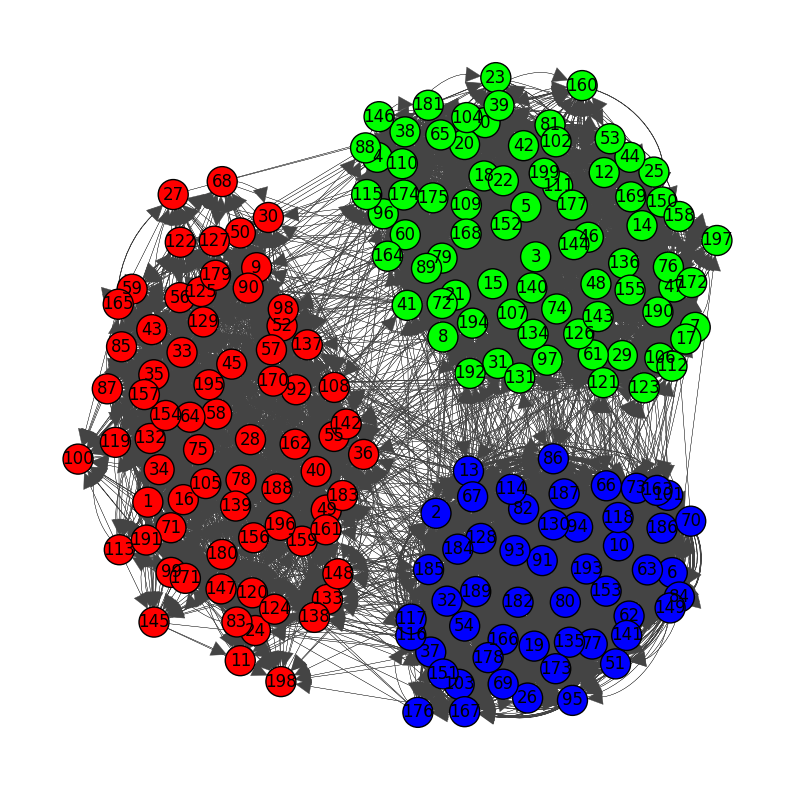

Simulated diffusion  with rows representing individuals  200  and columns representing time steps. 1 = informed, 0 = uninformed


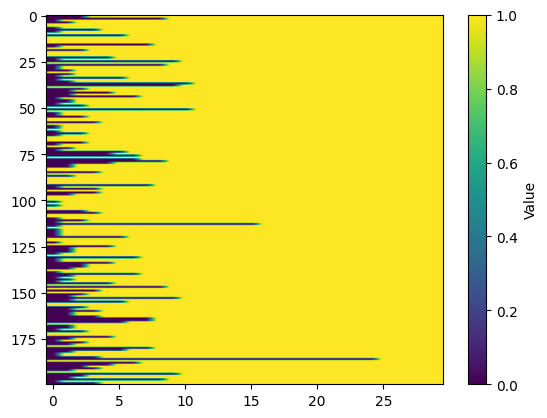

jax.local_device_count 32


sample: 100%|██████████| 2000/2000 [00:58<00:00, 34.44it/s, 3 steps of size 4.14e-01. acc. prob=0.74] 
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


Estimated parameters
                mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha_asoc[0]  -0.96  0.08     -1.09      -0.84       0.01     0.00    293.85   
alpha_soc[0]  -11.85  4.90    -18.18      -5.44       0.31     0.22    186.33   

               ess_tail  r_hat  
alpha_asoc[0]    210.56    NaN  
alpha_soc[0]      56.22    NaN  
Simulated vs estimated parameters


Text(0, 0.5, 'Estimated effects')

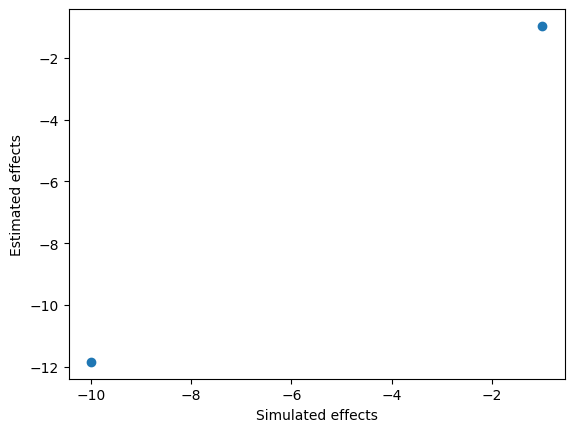

In [28]:
N=200 # Number of individuals
times=30 # number of time steps
print("Simulated network with N = ", str(N))
covariates_data = create_covariates(N=N, times=times) # Create covariates'
nbda=NBDA(covariates_data['network'], jnp.zeros((N,times))) # Initialyze nbda class with dummy status
nbda.get_cov()

# Set simulation parameters (those to recover)
alpha_social = jnp.array([-10])
alpha_asocial =jnp.array([-1])
nbda = diffusion(nbda, alpha_social, alpha_asocial) # Simulate difussion
print("Simulated diffusion  with rows representing individuals ", str(N), " and columns representing time steps. 1 = informed, 0 = uninformed")
heatmap(nbda.status)

# Run model to recover parameters
m = bi()
m.data_on_model=dict(D_asocial = nbda.D_asocial, D_social = nbda.D_social, network = nbda.network, status = nbda.status)
m.run(model, num_samples=1000, num_warmup=1000, num_chains=1, seed=0) 
summary = m.summary(kind = 'all')
print("Estimated parameters")
print(summary)

# Plot results
print("Simulated vs estimated parameters")
plt.scatter(jnp.concatenate([alpha_asocial,alpha_social]), summary['mean'].values)
plt.xlabel('Simulated effects')
plt.ylabel('Estimated effects')


# Main simulation function

This function runs the simulation as shown in the previous section and returns:

* The simulated data
* The true parameters
* The estimated parameters

In [ ]:
def main(N = 100, times = 30, alpha_social = jnp.array([-10]), alpha_asocial =jnp.array([-1])):
    """Main simulation function

    Args:
        N (int, optional): Number of individuals. Defaults to 100.
        times (int, optional): Number of time steps. Defaults to 30.
        alpha_social (jnp.array, optional): Coefficients for social effect covariates. Defaults to jnp.array([-10]).
        alpha_asocial (jnp.array, optional): Coefficients for asocial effect covariates. Defaults to jnp.array([-1]).
    """
    covariates_data = create_covariates(N=N, times=times) # Create covariates'
    nbda=NBDA(covariates_data['network'], jnp.zeros((N,times))) # Initialyze nbda class with dummy status
    nbda.get_cov()

    # Set simulation parameters (those to recover)
    alpha_social = jnp.array([-10])
    alpha_asocial =jnp.array([-1])
    nbda = diffusion(nbda, alpha_social, alpha_asocial) # Simulate difussion
    print("Simulated diffusion  with rows representing individuals ", str(N), " and columns representing time steps. 1 = informed, 0 = uninformed")
    heatmap(nbda.status)

    # Run model to recover parameters
    m = bi()
    m.data_on_model=dict(D_asocial = nbda.D_asocial, D_social = nbda.D_social, network = nbda.network, status = nbda.status)
    m.run(model, num_samples=1000, num_warmup=1000, num_chains=1, seed=0) 
    summary = m.summary(kind = 'all')
    print(summary)
    print((m.diag_density()))

    # Plot results
    plt.scatter(jnp.concatenate([alpha_asocial,alpha_social]), summary['mean'].values)
plt.xlabel('Simulated effects')
plt.ylabel('Estimated effects')


Build the NBDA object

In [14]:
nbda=NBDA(covariates_data['network'], jnp.zeros((n,t)))
#df['stress'] = bi.dist.normal(0, 1, shape = (df.shape[0],), sample=True)
#nbda.import_covNF(df)
#nbda.import_covNV(covariates_data['covV'][:,:t].reshape((-1,N,t)))
#nbda.import_covDF(covariates_data['covDF'][:,:,0])
#nbda.import_covDV(covariates_data["covDV"][:,:,:t])
#covDV2=jnp.array([covariates_data['covDV'],covariates_data['covDV']]) # test with two covariates

objects=nbda.stack_cov()
print('Covariates in NBDA object')
print(objects.keys())
print('Array of social covariates')
print(nbda.get_cov()[0].shape)
print('Array of asocial covariates')
print(nbda.get_cov()[1].shape)

Covariates in NBDA object
dict_keys(['intercept', 'status', 'status_i', 'status_j', 'network'])
Array of social covariates
(200, 200, 30, 1)
Array of asocial covariates
(200, 30, 1)


Run the simulation

[-10.]
[-1.]


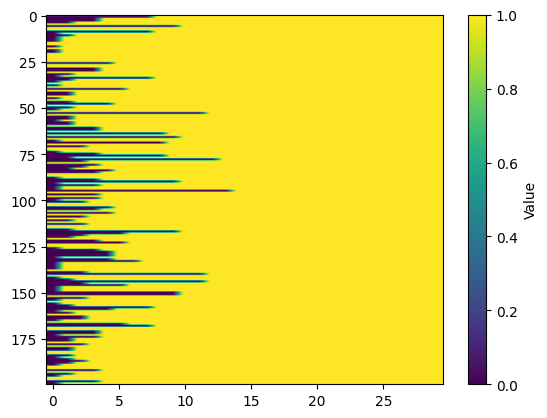

In [8]:
# Declare effects coefficients
alpha_social = bi.dist.normal(0, 0.01, shape = (nbda.D_social.shape[3],), sample=True)
alpha_asocial = bi.dist.normal(0, 0.001, shape = (nbda.D_asocial.shape[2],), sample=True)
#alpha_social = jnp.zeros((nbda.D_social.shape[3],))
#alpha_asocial =jnp.zeros((nbda.D_asocial.shape[2],))
alpha_social = alpha_social.at[0].set(-10)
alpha_asocial = alpha_asocial.at[0].set(-1)
print(alpha_social)
print(alpha_asocial)

simulated_status = diffusion(nbda, alpha_social, alpha_asocial)
heatmap(simulated_status)

Recreating NBDA object with simulated status

In [9]:
nbda=NBDA(covariates_data['network'], simulated_status)
nbda.get_cov()
#df['stress'] = bi.dist.normal(0, 1, shape = (df.shape[0],), sample=True)
#nbda.import_covNF(df)
#nbda.import_covNV(covariates_data['covV'][:,:t].reshape((-1,N,t)))
#nbda.import_covDF(covariates_data['covDF'][:,:,0])
#nbda.import_covDV(covariates_data["covDV"][:,:,:t])
#covDV2=jnp.array([covariates_data['covDV'],covariates_data['covDV']]) # test with two covariates
#
#objects=nbda.stack_cov()
#print('Covariates in NBDA object')
#print(objects.keys())
#print('Array of social covariates')
#print(nbda.get_cov()[0].shape)
#print('Array of asocial covariates')
print(nbda.get_cov()[1].shape)
# ! status_i and status-j are the lagged status (t-1)

(200, 30, 1)


# Parameter recovery


#### With for loop

jax.local_device_count 32


sample: 100%|██████████| 2000/2000 [00:46<00:00, 42.93it/s, 3 steps of size 3.53e-01. acc. prob=0.83] 
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


                mean    sd  hdi_5.5%  hdi_94.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha_asoc[0]  -0.92  0.08     -1.04      -0.80       0.00     0.00    454.38   
alpha_soc[0]  -12.19  5.02    -19.05      -5.27       0.39     0.28    148.76   

               ess_tail  r_hat  
alpha_asoc[0]    464.77    NaN  
alpha_soc[0]     114.30    NaN  
[[<Axes: title={'center': 'alpha_asoc\n0'}> <Axes: title={'center': 'alpha_soc\n0'}>]]


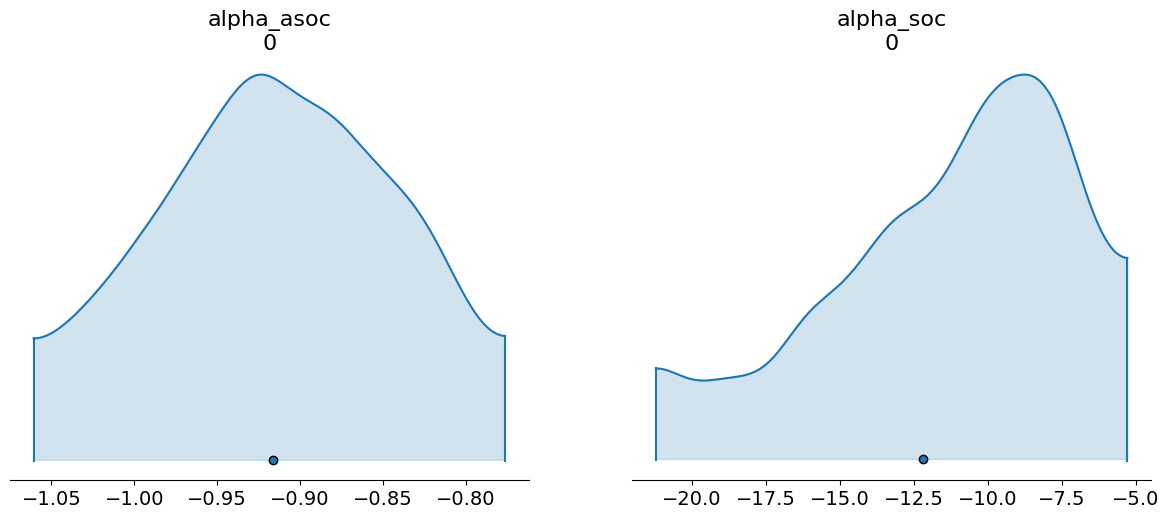

In [10]:
m = bi()
m.data_on_model=dict(D_asocial = nbda.D_asocial, D_social = nbda.D_social, network = nbda.network, status = nbda.status)

def  model(D_asocial, D_social, status, network):
    N = status.shape[0]
    T = status.shape[1]
    lk = jnp.zeros((N,T))

    # Priors for social effect covariates
    alpha_soc = bi.dist.normal(0, 10, shape = (D_social.shape[3],), sample=False, name='alpha_soc')

    # Priors for asocial effect covariates
    alpha_asoc = bi.dist.normal(0, 10, shape = (D_asocial.shape[2],), sample=False, name='alpha_asoc')

    # Asocial learning -----------------------
    R_asocial = jnp.tensordot(D_asocial[:,0,:], alpha_asoc, axes=(-1, 0))    
    theta = bi.link.inv_logit(R_asocial)
    lk = lk.at[:,0].set(theta)


    for t in range(1,times):
        ## Social learning-----------------------
        R_social = jnp.tensordot(D_social[:,:,t,:], alpha_soc, axes=(-1, 0))
        phi = bi.link.inv_logit(R_social)
        attention_weigthed_network = phi*network[:,:,t,0]
        social_influence_weight = inv_logit2(jnp.tensordot(attention_weigthed_network[:,:], status[:,t-1], axes=(-1, 0)))

        ## Asocial learning -----------------------
        R_asocial = jnp.tensordot(D_asocial[:,t,:], alpha_asoc, axes=(-1, 0))
        theta = bi.link.inv_logit(R_asocial)
        
        # Informed update at t!= 0-----------------------
        lk = lk.at[:,t].set(jnp.where(status[:, t-1][:,0] == 1, jnp.nan, theta + (1-theta)*social_influence_weight[:,0]))

    mask = ~jnp.isnan(lk)
    with numpyro.handlers.mask(mask=mask): 
        #m.binomial(probs=lk, obs=status[:,:,0])
        numpyro.sample("y", numpyro.distributions.Binomial(probs=lk), obs=status[:,:,0])


m.run(model, num_samples=1000, num_warmup=1000, num_chains=1, seed=0) 
summary = m.summary(kind = 'all')
print(summary)
print((m.diag_density()))

In [11]:
[alpha_asocial,alpha_social]

[Array([-1.], dtype=float64), Array([-10.], dtype=float64)]

Parameters to recover

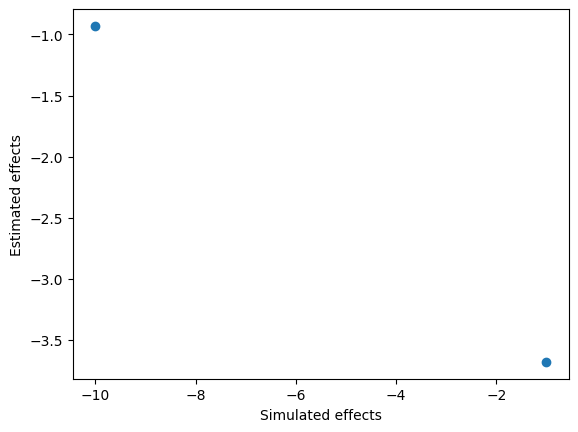

In [ ]:
plt.scatter(jnp.concatenate([alpha_asocial,alpha_social]), summary['mean'].values)
plt.xlabel('Simulated effects')
plt.ylabel('Estimated effects')
plt.show()

#### Without for loop

In [20]:
D_asocial = nbda.D_asocial
D_social = nbda.D_social
network = nbda.network
status = nbda.status
status_i = nbda.status_i
status_j = nbda.status_j
N = status.shape[0]
t = status.shape[1]
# Priors for social effect covariates
alpha_soc = bi.dist.normal(0, 100, shape = (D_social.shape[3],), sample=True, name='alpha_soc')

# Priors for asocial effect covariates
alpha_asoc = bi.dist.normal(0, 100, shape = (D_asocial.shape[2],), sample=True, name='alpha_soc')

# tensordot generate the dot product between the last axis of D_social and the first axis of alpha_social (both need to match in shape)
# R_social now became an array of shape (N, N, t) as the dot product combine covariates effects on each individuals.
# expand_dims add a new axis to R_social, so that it can be broadcasted with network (which has shape (N, N, t, v) where v is the number of networks) 
R_social = jnp.expand_dims(jnp.tensordot(D_social, alpha_social, axes=(-1, 0)), axis = -1)
phi = bi.link.inv_logit(R_social)
attention_weigthed_network = phi*network
# status_j is the status of the j-th individual at time t-1, it has shape (N, N, t, v) where v is the number of different status (multiple status are possible).
# For t = 0 and  v = 0 we get a 2d array of shape (N, N) where each rows give status of the j-th individual at time t-1.
# So we multiply each rows at time t by the status of the j-th individual at time t-1 and sum the rows to get the social influence weight for a given individual at time t.
social_influence_weight = inv_logit2(jnp.sum(attention_weigthed_network * status_j, axis = 1)) # ! this may not be the correct operatioon


R_asocial = jnp.expand_dims(jnp.tensordot(D_asocial, alpha_asocial, axes=(-1, 0)), axis=-1) # Same as R_social 
theta = bi.link.inv_logit(R_asocial)

In [58]:
mask = jnp.where(jnp.isnan(lk),jnp.nan, lk)
numpyro.distributions.Binomial(probs = lk).log_prob(status[:,:,0]).mask(mask)

AttributeError: 'jaxlib.xla_extension.ArrayImpl' object has no attribute 'mask'

 Parameters to recover:

## Only social and asocial rate

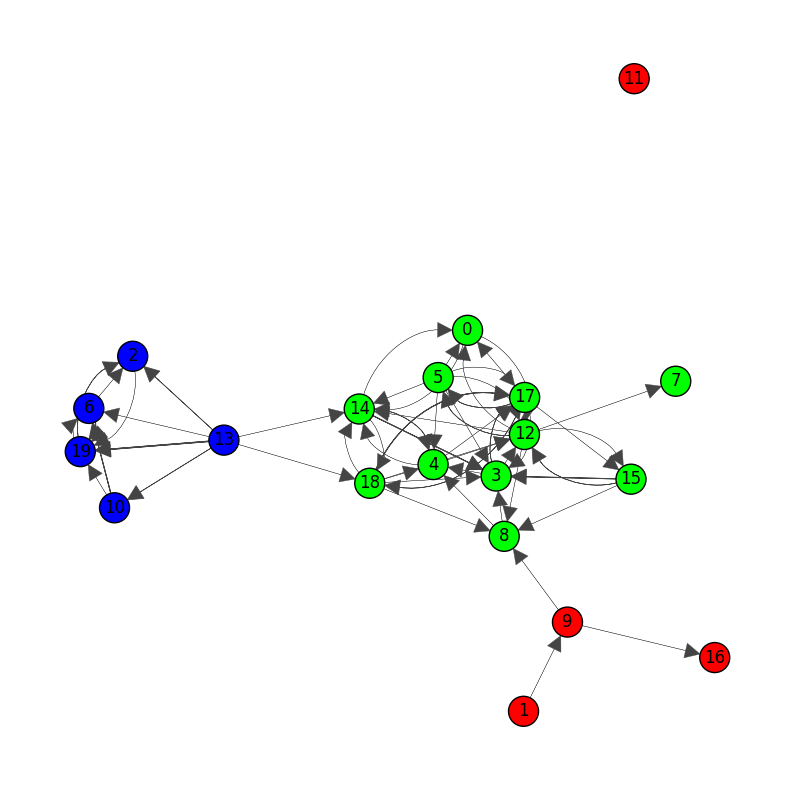

NameError: name 'data' is not defined

In [26]:
# Create covariates
import random
N = 20
times = 50
def symmetrize(array):
    return (array + array.T) / 2
covariates_data = create_covariates(N=N, times=times,
b_ij_mean1 = 0.5, b_ij_sd1 = 0.5, b_ii_mean1 = 0.7, b_ii_sd1 = 1.5,
b_ij_mean = 0.02, b_ij_sd = 0.1, b_ii_mean = 0.4, b_ii_sd = 0.1)
covariates_data= {k: jnp.array(covariates_data[k]) for k in covariates_data.keys()}
covariates_data.keys()
data['network']


In [27]:
data = covariates_data
network = data['network']
N = network.shape[0]
# Initialize informed matrix
informed = np.zeros((N, times), dtype=int)
# Test flag
test = True
alpha_asoc = -1
alpha = 4
theta = bi.link.inv_logit(alpha_asoc)
t = 0
informed[:, t] = dist.binomial(probs=theta,sample=True, seed=random.randint(0, 1000),shape=(N,))
network
t = 1
attention_weigthed_network= bi.link.inv_logit(alpha)*network
attention_weigthed_network

Array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 1.96, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.98, 0.  , 0.  , 0.98, 0.  , 0.  ],
       [0.98, 0.  , 0.  , 0.98, 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.98, 0.  , 0.  , 0.98, 0.  , 0.  ],
       [0.  , 0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.96],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,

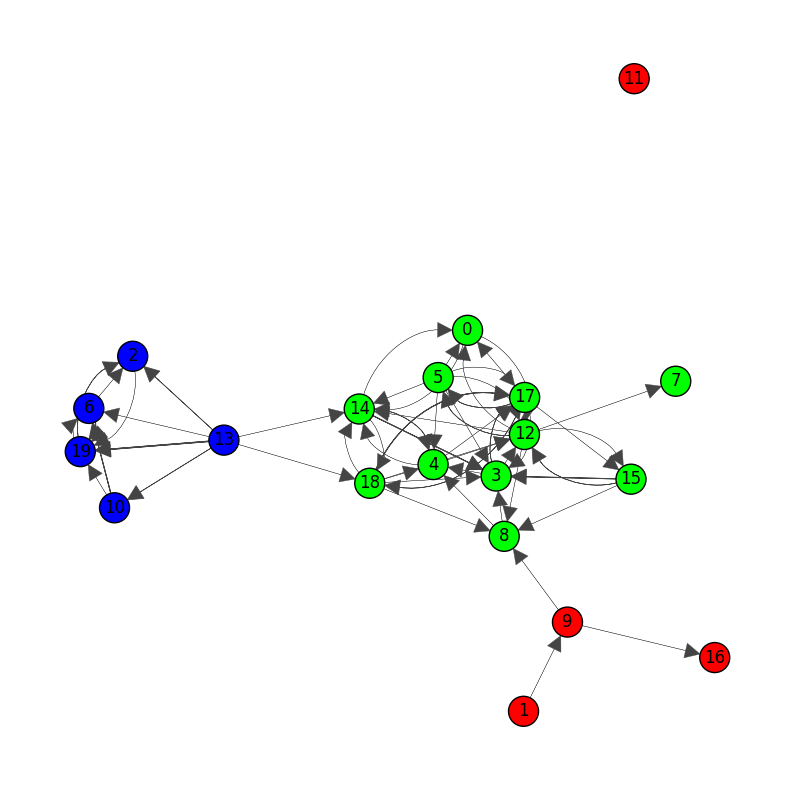

network
(20, 20)
All individuals are informed at time 8.
informed
(20, 9)


In [31]:
# Create covariates
import random
N = 20
times = 50
def symmetrize(array):
    return (array + array.T) / 2
covariates_data = create_covariates(N=N, times=times,
b_ij_mean1 = 0.5, b_ij_sd1 = 0.5, b_ii_mean1 = 0.7, b_ii_sd1 = 1.5,
b_ij_mean = 0.02, b_ij_sd = 0.1, b_ii_mean = 0.4, b_ii_sd = 0.1)
covariates_data= {k: jnp.array(covariates_data[k]) for k in covariates_data.keys()}
covariates_data.keys()
print('network')
print(covariates_data['network'].shape)

# Simulate diffusion
def diffusion(data, times, alpha=0.5, alpha_asoc=-1):
    """
    Simulates the diffusion process.

    Args:
        data (dict): Data dictionary from create_covariates.
        times (int): Number of time steps.
        alpha (float): Intercept of social regression model.
        alpha_asoc (float): Intercept of asocial regression model.

    Returns:
        numpy.ndarray: Informed matrix of shape (N, times).
    """
    # Extract data
    network = data['network']
    N = network.shape[0]
    
    # Initialize informed matrix
    informed = np.zeros((N, times), dtype=int)
    # Test flag
    test = True
    theta = inv_logit(alpha_asoc)
    for t in range(times):
        if t == 0:
            # Asocial learning at time 0
            informed[:, t] = dist.binomial(probs=theta,sample=True, seed=random.randint(0, 1000),shape=(N,))
        else:
            # Social influence from informed neighbors
            network_filtered = inv_logit(alpha)*network*informed[:, t-1] # select only informed alters
            soc_influence = network_filtered.sum(axis=1)
            soc_influence_inv = inv_logit2(soc_influence)
            soc_influence_softmax = jax.nn.softmax(soc_influence) # ! inv_logit2 give high probability very quickly while softmax weight values more swiftly

            # Combined probability
            prob = (theta + (1 - theta) * soc_influence_inv)*(1-informed[:, t-1]) # set prob to zero for informed individuals

            # Update informed status
            informed[:, t] = informed[:, t-1] + dist.binomial(total_count=jnp.ones_like(prob).astype(jnp.int64),probs=prob,sample=True, seed=random.randint(0, 1000))

        # Check if all are informed
        if test and np.all(informed[:, t] == 1):
            print(f"All individuals are informed at time {t}.")
            return informed[:, :t+1]
    
    return informed

covariates_data['network'] = symmetrize(covariates_data['network'])

informed = diffusion(covariates_data,times)
informed.shape

print('informed')
print(informed.shape)

# build nbda object
nbda=NBDA(covariates_data['network'], informed)
objects=nbda.get_cov()



In [ ]:
m = bi()
m.data_on_model=objects
def  model(status,status_i,status_j,network):
    N = status.shape[0]
    t = status.shape[1]

    # Priors on raw parameters (unconstrained)
    alpha_asoc = bi.dist.normal(0,100,sample=False, name='alpha_asoc')
    alpha_soc = bi.dist.normal(0,100,sample=False, name='alpha_soc')
    
    # Priors on constrained space (0,1)    
    alpha_asoc = bi.link.inv_logit(alpha_asoc)
    alpha_soc = bi.link.inv_logit(alpha_soc)
    
    # Asocial effect
    asocial_effect = alpha_asoc*(1-status_i) # filter individuals with status_i = 1

    # Social effect
    #soc_effect = jax.nn.softmax(alpha_soc*network*status_j, axis=0) # filter individuals with status_j = 1
    social_effect = inv_logit2(alpha_soc*network*status_j) 

    probs = (alpha_asoc + (1-alpha_asoc)*social_effect) # filter individuals with status_i = 0
    likelihood = jnp.sum(probs,axis=1) # sum over all individuals
    m.binomial(probs=likelihood, obs=status)

m.run(model, num_samples=1000, num_chains=4, num_warmup=1000,progress_bar=False) 
print(m.summary())

### Model with for loop

In [35]:
m = bi()
status1=objects['status'][:,:,0]
network1=covariates_data['network']
m.data_on_model = dict(status1=status1, network1=network1)
def  model(status1,network1):
    N = status1.shape[0]
    time = status1.shape[1]

    # Priors on raw parameters (unconstrained)
    alpha_asoc = bi.dist.normal(0,100,sample=False, name='alpha_asoc')
    alpha_asoc = bi.link.inv_logit(alpha_asoc)

    alpha_soc = bi.dist.normal(0,100,sample=False, name='alpha_soc')
    
    probs= jnp.zeros((N,time))
    for t in range(time):
        # Asocial effect
        if t == 0:
            probs=probs.at[:,t].set(alpha_asoc)
        else:
            network_filtered = inv_logit(alpha_soc) *network1*status1[:, t-1] # select only informed neighbors
            soc_influence = network_filtered.sum(axis=1)
            soc_influence_inv = inv_logit2(soc_influence)

            probs=probs.at[:,t].set((alpha_asoc + (1-alpha_asoc)*soc_influence_inv)*(1-status1[:, t-1]))

    m.binomial(probs=probs, obs=status1)

m.run(model, num_samples=1000, num_chains=4, num_warmup=1000,progress_bar=False) 
print(m.summary())

jax.local_device_count 16
             mean     sd  hdi_5.5%  hdi_94.5%
alpha_asoc  -0.11   0.44     -0.84       0.57
alpha_soc   74.56  63.24      0.31     168.68


## Checking correctness of the objects returned by nbda class
### Status

In [18]:
status[:,:,0]

Array([[0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.]], dtype=float64)

In [48]:
for a in range(status_j.shape[2]):
    print(np.unique(jnp.where((status_j)[:,:,a,0]==1)[1]))


[]
[16 17]
[ 5 11 12 13 15 16 17 18]
[ 0  1  2  5  6  7  8  9 10 11 12 13 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [50]:
for a in range(status.shape[1]):
    print(np.unique(jnp.where(status[:,a]==1)[0]))


[16 17]
[ 5 11 12 13 15 16 17 18]
[ 0  1  2  5  6  7  8  9 10 11 12 13 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


### Network

In [51]:
for a in range(network.shape[2]):
    print(jnp.array_equal(network[:,:,0],network[:,:,a]))

True
True
True
True
True
True
True
True
True


## Checking correctness of mathematical operations

In [98]:
tmp = bi.dist.normal(0, 1,sample=True, shape=(5,5,2,1))
tmp[:,:,0,0]

Array([[-1.98,  0.89, -0.95,  0.03,  0.01],
       [-1.23,  0.99, -0.41, -0.69, -1.97],
       [-0.58,  0.28,  0.06, -0.23,  0.66],
       [ 1.04, -0.07, -0.38,  0.28,  0.87],
       [ 0.38,  0.14,  1.74, -0.03, -0.96]], dtype=float64)

In [114]:
jnp.sum(tmp[:,:,0,0], axis=0)

Array([-2.38,  2.23,  0.06, -0.63, -1.38], dtype=float64)

In [ ]:
jnp.sum(tmp[0,:,0,0])

Array(-3.32, dtype=float64)

In [90]:
jnp.sum(tmp[:,0,0,0])

Array(-2.38, dtype=float64)

In [91]:
jnp.sum(tmp[:,:,0,0],axis=0)

Array([-2.38,  2.23,  0.06, -0.63, -1.38], dtype=float64)

Array([[[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]],

       [[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [1]]], dtype=int64)

In [335]:
m = bi()
m.data_on_model=objects
def  model(covNF_i,covNF_j,
covNV_i,covNV_j,
covDF,covDV,
status,status_i,status_j,
network):
    N = status.shape[0]
    t = status.shape[1]
    # Priors for covariate on social effect
    alpha_soc = bi.dist.normal(0,10,sample=False, name='alpha_soc')
    beta_soc_cF_i = bi.dist.normal(0,1,shape=(covNF_i.shape[3],),sample=False, name='beta_soc_cF_i')
    beta_soc_cF_j = bi.dist.normal(0,1,shape=(covNF_j.shape[3],),sample=False, name='beta_soc_cF_j')
    beta_soc_cV_i = bi.dist.normal(0,1,shape=(covNV_i.shape[3],),sample=False, name='beta_soc_cV_i')
    beta_soc_cV_j = bi.dist.normal(0,1,shape=(covNV_j.shape[3],),sample=False, name='beta_soc_cV_j')
    beta_soc_cDF = bi.dist.normal(0,1,shape=(covDF.shape[3],),sample=False, name='beta_soc_cDF')
    beta_soc_cDV = bi.dist.normal(0,1,shape=(covDV.shape[3],),sample=False, name='beta_soc_cDV')
#
    cov_effect = nbda.sum_cov_effect(N,t,
        [covNF_i,covNF_j,covNV_i,covNV_j,covDF,covDV],
        [beta_soc_cF_i, beta_soc_cF_j, beta_soc_cV_i, beta_soc_cV_j, beta_soc_cDF, beta_soc_cDV]
    )
#
    #cov_effect_soc = alpha_soc+(cov_effect)*(1-status_i) # filter individuals with status_i = 0


    # social effect 
    soc_effect = inv_logit2(alpha_soc+(network*status_j[:,:,:,None]))# filter individuals with status_j = 1
    
    #soc_effect =(cov_effect_soc[:,:,:,None]*soc_effect)

    # Priors for covariate on asocial effect
    alpha_asoc = bi.dist.normal(0,10,sample=False, name='alpha_asoc')
    beta_asoc_cF_i = bi.dist.normal(0,1,shape=(covNF_i.shape[3],),sample=False, name='beta_asoc_cF_i')
    beta_asoc_cV_i = bi.dist.normal(0,1,shape=(covNV_i.shape[3],),sample=False, name='beta_asoc_cV_i')
#
#
    ## No cov with j nor dyadic
    cov_effect_asoc = nbda.sum_cov_effect(N,t,
        [covNF_i,covNV_i],
        [beta_asoc_cF_i, beta_asoc_cV_i,]
    )

    cov_effect_asoc = bi.link.inv_logit((alpha_asoc) *(1-status_i)) # filter individuals with status_i = 0

    likelihood = jnp.sum(cov_effect_asoc+ (1 - cov_effect_asoc) * soc_effect[:,:,:,0]) # sum over all individuals
    lk('y', Binomial(probs=likelihood), obs=status)

m.run(model, num_samples=500) 
m.summary()

jax.local_device_count 32


TypeError: model() got an unexpected keyword argument 'intercept'

To recover: 
- alpha_asoc=0.05
- alpha_soc=0.05
- beta_asoc_cF	= 0.01
- beta_asoc_cV = 0.05
- beta_cDF	= 0.1
- beta_cDV	= -0.2
- beta_cF_i	= 0.2
- beta_cF_j	= 0.1
- beta_cV_i	= -0.1
- beta_cV_j	= -0.1